## **Trabajo Práctico Individual n° 2: Aprendizaje Supervisado**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

 - Nombre: Emilce
 - Apellido: Rodriguez Cabrera
 - Legajo: 147.781-0

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el aprendizaje automático supervisado.

Utilizaremos un dataset de airbnb donde buscaremos predecir el precio de las noches de cada hogar en funcion de algunas variables.

#### Variables:
- Unnamed: 0: Variable de contador de registros (no será utilizada en nuetro análisis)
- neighbourhood: Barrio donde se encuentra ubicado la casa.
- room_type: Tipo de hogar en alquiler.
- price: Precio por noche.
- minimum_nights: Cantidad minimas de noches que pueden alquilar el hogar.
- number_of_reviews: Cantidad de reviews
- reviews_per_month: Tasa de reviews que tienen por mes
- calculated_host_listings_count: Cantidad de hogares ofrecidos por el host.
- availability_365: Cantidad de dias que se encuentra en alquiler el hogar

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 13 de Octubre 2022 a las 23h59

In [1]:
## Importo librerías de maniupulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
## Importo librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import svm, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR, LinearSVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV


##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset bajo en nombre "london"
- corroborar que lo hayamos cargado correctamente.

In [3]:
# Se importo el dataset con Pandas
london = pd.read_csv('TP2_airbnb_london.csv')
# Se muestra las primeras 5 filas del dataset
london.head()

,Unnamed: 0,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,Haringey,Private room,35,1,131,1.71,4,262
1,1,Ealing,Private room,70,2,2,0.07,6,62
2,2,Islington,Private room,45,1,14,0.14,2,364
3,5,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295
4,6,Barnet,Private room,29,5,114,1.13,3,285


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset y eliminar la variable "Unnamed:0" del dataset.
Volver a guardar el dataset sin esta variable bajo el nombre "london" 

In [4]:
# Se muestra las dimensiones (filas, columnas)
london.shape


(51827, 9)

In [5]:
# Se borra la columna no desea y se guada en la misma variable
london= london.iloc[:,1:]
london.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Haringey,Private room,35,1,131,1.71,4,262
1,Ealing,Private room,70,2,2,0.07,6,62
2,Islington,Private room,45,1,14,0.14,2,364
3,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295
4,Barnet,Private room,29,5,114,1.13,3,285


In [6]:
# Verificacion
london.shape

(51827, 8)

##### **Objetivo 3**
Corroborar que el dataset no cuenta con valores nulos, si los hubiera llenarlos todos con 0.

In [7]:
# Verificacion de existencia de nulos
london.isnull().any()

neighbourhood                     False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

##### **Objetivo 4**
Mostrar el tipo de dato para las variables "neighbourhood" y "room_type".

In [8]:
# Se muestra en pantalla el tipo de dato
london.neighbourhood.info()

<class 'pandas.core.series.Series'>
RangeIndex: 51827 entries, 0 to 51826
Series name: neighbourhood
Non-Null Count  Dtype 
--------------  ----- 
51827 non-null  object
dtypes: object(1)
memory usage: 405.0+ KB


In [9]:
london.room_type.info()

<class 'pandas.core.series.Series'>
RangeIndex: 51827 entries, 0 to 51826
Series name: room_type
Non-Null Count  Dtype 
--------------  ----- 
51827 non-null  object
dtypes: object(1)
memory usage: 405.0+ KB


##### **Objetivo 5**
Generar las variables dummies para estas dos variables categóricas y unirlas al dataset london.


In [10]:
# Se crean las dummies de las dos variables y se guadan en una nueva variable
n_d = pd.get_dummies(london.neighbourhood)

Imprimir las dimensiones y primeras lineas de estas dummies

In [11]:
n_d.head(2)

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
n_d.shape

(51827, 33)

In [13]:
r_d = pd.get_dummies(london.room_type)

Imprimir las dimensiones y primeras lineas de estas dummies

In [14]:
r_d.head(2)

,Entire home/apt,Private room,Shared room
0,0,1,0
1,0,1,0


In [15]:
r_d.shape

(51827, 3)

Joinear las variables dummies al dataset



In [16]:
dummies=pd.concat([n_d,r_d], axis=1)
london=london.join(dummies)

In [17]:
london.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Barking and Dagenham,Barnet,...,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Entire home/apt,Private room,Shared room
0,Haringey,Private room,35,1,131,1.71,4,262,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Ealing,Private room,70,2,2,0.07,6,62,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Islington,Private room,45,1,14,0.14,2,364,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295,0,0,...,0,0,0,1,0,0,0,1,0,0
4,Barnet,Private room,29,5,114,1.13,3,285,0,1,...,0,0,0,0,0,0,0,0,1,0


In [18]:
london['price'].value_counts()

50     1850
100    1834
40     1828
35     1737
30     1592
       ... 
287       1
262       1
291       1
274       1
282       1
Name: price, Length: 291, dtype: int64

##### Dividiremos nuestro dataset en la variable dependiente "y" (label o etiqueta) y las variables independientes "x"

In [19]:
y = np.array(london[['price']])

x = london.drop(['price','neighbourhood','room_type'], axis=1)
x.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,...,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Entire home/apt,Private room,Shared room
0,1,131,1.71,4,262,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,2,0.07,6,62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,14,0.14,2,364,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5,7,0.07,56,295,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,114,1.13,3,285,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
print(np.shape(x))
print(np.shape(y))

(51827, 41)
(51827, 1)


##### **Objetivo 7**

Dividir el dataset entre Train y Test, tomar un test_size del 30%.

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
# Se observan las dimenciones de las nuevas variables
ytrain.shape

(36278, 1)

In [23]:
xtrain.shape

(36278, 41)

In [24]:
xtest.shape

(15549, 41)

##### **Objetivo 8**
Con el StandardScaler generado en la linea siguiente, realizar el transform para el xtrain y xtest guardandolos en nuevas variables llamadas "xtrain_scal" y "xtest_scal".


In [25]:
xt=xtrain.iloc[:, lambda xtrain: [0,1,2,3,4]]
xd=xtrain.iloc[:, 5:]

In [26]:
scaler = preprocessing.StandardScaler().fit(xt)

In [27]:
xtrain_scal = scaler.transform(xt) 
print(xtrain_scal.mean(axis=0))
print(xtrain_scal.std(axis=0))

[-9.63633679e-17  3.93679613e-17  9.20544368e-18  3.03583781e-17
 -5.70933369e-17]
[1. 1. 1. 1. 1.]


In [28]:
np.concatenate((xtrain_scal,xd),axis = 1)

array([[-0.21856659,  0.03533178,  2.01736052, ...,  0.        ,
         1.        ,  0.        ],
       [-0.21856659, -0.43134843, -0.58791495, ...,  0.        ,
         1.        ,  0.        ],
       [-0.84776505,  1.55204245,  4.50484428, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.21856659, -0.40218091, -0.40776293, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.41063186,  2.86458053,  0.2019824 , ...,  0.        ,
         1.        ,  0.        ],
       [ 2.29822723,  0.32700691, -0.08210349, ...,  1.        ,
         0.        ,  0.        ]])

In [29]:
xte=xtest.iloc[:, lambda xtest: [0,1,2,3,4]]
xde=xtest.iloc[:, 5:]

In [30]:
xtest_scal = scaler.transform(xte)  
print(xtest_scal.mean(axis=0))
print(xtest_scal.std(axis=0))

[-0.00260209 -0.00022674 -0.01362305 -0.00027815 -0.00465902]
[0.9884395  1.00568514 0.98300218 1.00932226 1.00287909]


In [31]:
np.concatenate((xtest_scal,xde),axis = 1)

array([[ 2.92742568, -0.54801848, -0.87200084, ...,  1.        ,
         0.        ,  0.        ],
       [-0.84776505, -0.54801848, -0.8304273 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.21856659, -0.28551086,  1.29675241, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.21856659, -0.51885096,  0.36827658, ...,  0.        ,
         1.        ,  0.        ],
       [-0.21856659,  0.41450945,  0.77015418, ...,  0.        ,
         1.        ,  0.        ],
       [-0.84776505,  0.12283432,  0.69393601, ...,  0.        ,
         1.        ,  0.        ]])

Text(0.5, 1.0, 'Standarized test data')

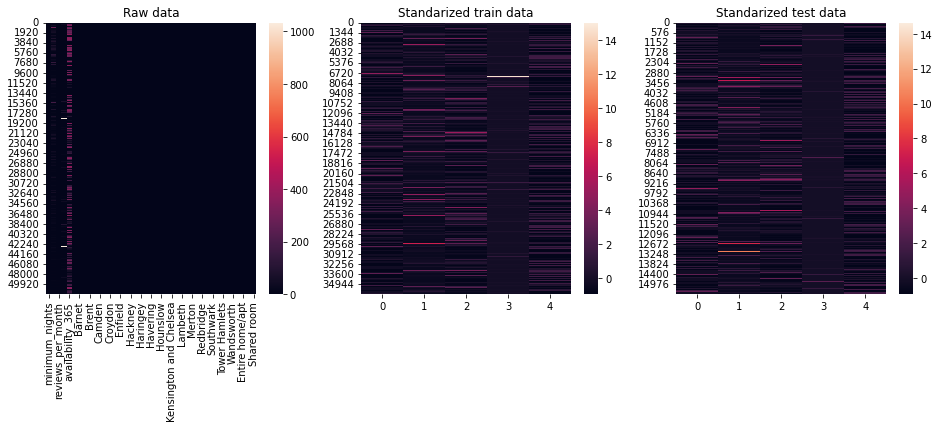

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.heatmap(x, ax = axs[0])
sns.heatmap(xtrain_scal, ax = axs[1])
sns.heatmap(xtest_scal, ax = axs[2])
axs[0].set_title('Raw data')
axs[1].set_title('Standarized train data')
axs[2].set_title('Standarized test data')

##### **Objetivo 9**
Crear un modelo lineal y entrenarlo para nuestro dataset.

Obtener las predicciones y el "mean_squared_error" para el test set.

In [51]:
# Creamos el objeto de Regresión Linear
RL = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
RL.fit(xtrain, ytrain)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
ypredit = RL.predict(xtrain)

# Error Cuadrado Medio
np.sqrt(mean_squared_error(ytrain, ypredit)) 

39.27357118763295

##### **Objetivo 10**
Crear un SVM Regressor y un GridSearch para realizar la búsqueda de hiperparámetros.

Asignar dos posibles valores para el parámetro "kernel", y tres posibles valores para "C" y "gamma".

Setear al parámetro "refit" en True y hacer 5 CrossValidation.

In [34]:
#Creamos el modelo SVM Regressor 
svr = SVR()

In [35]:
# Hyperparametros
parameters = {'kernel':('linear','rbf'),
              'C':[1,10,100],
              'gamma':[0.01,0.1,1 ]}



In [36]:
clf = GridSearchCV(svr, # modelo
                  param_grid = parameters, # Hyperparametros
                  refit = True, # refit nos devuelve el modelo con los mejores parametros encontrados 
                cv = 5, # cv indica la cantidad de folds
                  verbose=2)

In [37]:
clf.fit(xtrain_scal, ytrain.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  25.4s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  25.9s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  25.4s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  25.3s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  25.4s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  41.4s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  41.8s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  42.2s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  41.5s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  42.3s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  25.7s
[CV] END ......................C=1, gamma=0.1, k

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1],
                         'kernel': ('linear', 'rbf')},
             verbose=2)

In [38]:
ypred = clf.predict(xtest_scal)

In [39]:
clf.best_score_

0.11022713207811978

##### **Objetivo 11**

Mostrar cuales fueron los mejores hiperparámetros y para estos obtener el mean_squared_error en el test set.

In [40]:
clf.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [41]:
np.sqrt(mean_squared_error(ytest, ypred))

52.52460395219074

##### **Objetivo 12**
Repetir el objetivo 10 pero ahora seteando nuevos valores para los hiperparámetros mencionados con el objetivo de mejorar las predicciones.

Cuales son los mejores hiperparámetros ahora?
Obtenemos una mejora en las predicciones?
Mostrar los resultados.

In [42]:
#Creamos el 2° modelo SVM Regressor 
svrs = SVR()


In [43]:
# Hyperparametros
parameterss = {'kernel':('linear','rbf'),
              'C':[0.001,0.01, 0.1],
              'gamma':[0.00001,0.0001,0.001]}

In [44]:
clfs = GridSearchCV(svrs, # modelo
                  param_grid = parameterss, # Hyperparametros
                  refit = True, # refit nos devuelve el modelo con los mejores parametros encontrados 
                cv = 5, # cv indica la cantidad de folds
                  verbose=2)

In [45]:
clfs.fit(xtrain_scal, ytrain.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ................C=0.001, gamma=1e-05, kernel=linear; total time=  25.7s
[CV] END ................C=0.001, gamma=1e-05, kernel=linear; total time=  26.0s
[CV] END ................C=0.001, gamma=1e-05, kernel=linear; total time=  26.2s
[CV] END ................C=0.001, gamma=1e-05, kernel=linear; total time=  25.7s
[CV] END ................C=0.001, gamma=1e-05, kernel=linear; total time=  26.3s
[CV] END ...................C=0.001, gamma=1e-05, kernel=rbf; total time=  43.1s
[CV] END ...................C=0.001, gamma=1e-05, kernel=rbf; total time=  43.3s
[CV] END ...................C=0.001, gamma=1e-05, kernel=rbf; total time=  41.8s
[CV] END ...................C=0.001, gamma=1e-05, kernel=rbf; total time=  41.9s
[CV] END ...................C=0.001, gamma=1e-05, kernel=rbf; total time=  41.8s
[CV] END ...............C=0.001, gamma=0.0001, kernel=linear; total time=  26.2s
[CV] END ...............C=0.001, gamma=0.0001, k

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1],
                         'gamma': [1e-05, 0.0001, 0.001],
                         'kernel': ('linear', 'rbf')},
             verbose=2)

In [46]:
clfs.best_params_

{'C': 0.01, 'gamma': 1e-05, 'kernel': 'linear'}

In [47]:
ypreds = clfs.predict(xtest_scal)

In [48]:
np.sqrt(mean_squared_error(ytest, ypreds))

55.31449584861764

In [49]:
print ("Dato real"+"\t"+"1° Prediccion"+"\t\t"+"2° Prediccion"+"\t\t\t"+"3° Prediccion")
n=0
for i in ytest:
    print (i,"\t\t",ypredit[n],"\t\t",ypred[n],"\t\t",ypreds[n]) 
    n=n+1  

Dato real	1° Prediccion		2° Prediccion			3° Prediccion
[165] 		 [44.16516113] 		 88.08980414131582 		 105.15713354933217
[220] 		 [48.60235596] 		 93.64794353936796 		 70.96895923751694
[62] 		 [41.80335999] 		 65.2557618054105 		 70.49656806477505
[79] 		 [49.28530884] 		 81.73379056685273 		 64.88061214241183
[25] 		 [106.41438293] 		 68.38228093703079 		 64.65709555296712
[100] 		 [132.11979675] 		 76.05429822819707 		 82.11547988277779
[60] 		 [140.97476196] 		 47.22128384867889 		 67.18525228738761
[70] 		 [58.20977783] 		 82.82703622830964 		 84.50498071535891
[64] 		 [12.96055603] 		 105.05601641398223 		 79.83869512885127
[119] 		 [97.44987488] 		 90.26053255649263 		 78.5858529547719
[99] 		 [29.29728699] 		 81.98039425030673 		 77.15766084965152
[40] 		 [126.46815491] 		 76.50511334278882 		 70.45130219171709
[150] 		 [46.18081665] 		 48.81008396000183 		 67.23046076367906
[40] 		 [123.76127625] 		 41.27304965685382 		 60.63851855046197
[18] 		 [71.93313599] 		 69.97178259062

[178] 		 [37.68188477] 		 70.43875778108433 		 78.96265546326737
[110] 		 [87.93101501] 		 89.90947076782368 		 70.55880154570677
[60] 		 [105.23757935] 		 68.9013845479374 		 79.03922171769686
[55] 		 [67.88793945] 		 94.95571679793427 		 79.20262109129771
[45] 		 [30.48822021] 		 47.778229909711015 		 67.06110453787673
[70] 		 [70.95301819] 		 82.90268642029483 		 69.04271154441066
[150] 		 [112.84312439] 		 77.03668099549392 		 65.8359369262454
[77] 		 [111.94482422] 		 72.37805567118126 		 60.22834291807612
[20] 		 [54.39619446] 		 57.378948914264114 		 68.52717588527643
[120] 		 [68.78460693] 		 50.97515748983999 		 66.75355615711753
[90] 		 [108.50033569] 		 52.58068777828237 		 64.6720955513885
[53] 		 [141.00631714] 		 74.60949194315226 		 132.2982372377538
[55] 		 [38.2966156] 		 79.87026362261228 		 91.32498751550179
[159] 		 [49.62496948] 		 72.9917653070836 		 72.90860515193779
[60] 		 [39.86375427] 		 49.1691545975271 		 62.67274627761271
[30] 		 [36.27064514] 		 72.576714

[25] 		 [128.27650452] 		 89.55826152807603 		 102.15251657829516
[149] 		 [39.21138] 		 52.98836668712818 		 67.35280923808503
[250] 		 [70.40014648] 		 67.63859651875755 		 70.26062467657945
[230] 		 [48.429245] 		 72.77734166426329 		 78.87679084097131
[85] 		 [102.70898438] 		 96.49162804425231 		 71.76789834003756
[85] 		 [89.00819397] 		 62.147447782784376 		 87.49638084950794
[130] 		 [96.00166321] 		 92.17781107637026 		 80.93940102137601
[50] 		 [49.38304138] 		 29.846941485115714 		 65.39628552167548
[99] 		 [21.42303467] 		 84.78868604214769 		 79.07604711847786
[65] 		 [104.57518005] 		 62.87244496643322 		 73.24622794779386
[49] 		 [137.98406982] 		 74.70988757842375 		 72.89980139656882
[171] 		 [114.94934082] 		 214.6294841751738 		 195.42838738254957
[59] 		 [109.81626892] 		 45.77864975844042 		 67.70080850280443
[40] 		 [115.28044128] 		 76.38889199718106 		 90.90340334934935
[99] 		 [58.42675781] 		 50.46889532170755 		 65.75424373431065
[59] 		 [115.39234924] 		 75.

[39] 		 [154.23498535] 		 63.24180656687483 		 73.23346690538895
[250] 		 [40.739151] 		 48.85948319296868 		 66.7703420629939
[54] 		 [127.7633667] 		 47.9940862383547 		 68.00673107528121
[220] 		 [106.16160583] 		 94.45084729150925 		 91.5485821566569
[21] 		 [51.23791504] 		 91.00599380108184 		 82.40615824535236
[85] 		 [47.69520569] 		 127.82327943752802 		 79.1724269015473
[30] 		 [69.70031738] 		 84.72590185914488 		 71.36304195060872
[20] 		 [94.10899353] 		 27.9003043124235 		 70.10314377763923
[50] 		 [48.76098633] 		 96.1537369111773 		 78.35774605738473
[100] 		 [25.39625549] 		 84.24847789101294 		 72.48471299445391
[81] 		 [66.16215515] 		 48.203884569811706 		 67.34184747078498
[50] 		 [107.93148804] 		 48.76269222750624 		 67.21769972127419
[38] 		 [130.13935852] 		 50.122354252799525 		 66.177129937399
[99] 		 [117.83836365] 		 109.13715326747445 		 100.43817784215442
[45] 		 [110.59114075] 		 47.612705284494695 		 62.4263522288643
[45] 		 [55.77539062] 		 48.02279376

[200] 		 [139.13514709] 		 87.07143757683185 		 80.51352426747248
[99] 		 [39.73887634] 		 135.2925021981133 		 81.68695824014154
[60] 		 [111.98982239] 		 47.36059707326444 		 67.41495105067611
[35] 		 [50.49510193] 		 78.68971814700086 		 72.78208438363716
[22] 		 [140.19274902] 		 49.37439856775204 		 67.14459614138309
[110] 		 [45.95083618] 		 45.74720744961561 		 68.97694641749005
[30] 		 [107.71124268] 		 47.90837562407626 		 67.21423704673576
[75] 		 [125.23294067] 		 47.31755550597998 		 67.38942896586622
[45] 		 [40.82853699] 		 73.6028450986234 		 78.99930358289727
[80] 		 [117.26109314] 		 53.17775218724353 		 63.579711932199785
[125] 		 [40.2374115] 		 51.67987551281133 		 65.84042097501971
[50] 		 [59.31562805] 		 67.1688480663861 		 73.30269749494316
[35] 		 [49.60545349] 		 48.00405728370379 		 63.373075650890954
[30] 		 [70.36854553] 		 87.26447825139151 		 71.78014832359635
[40] 		 [27.76377869] 		 79.1615873966437 		 67.70628885833767
[30] 		 [36.74685669] 		 70.83608

[200] 		 [125.12799072] 		 100.76039485999851 		 79.69249866887347
[75] 		 [51.7623291] 		 56.097632895386894 		 68.4478252152977
[49] 		 [45.15925598] 		 91.2462070358712 		 70.15924775187123
[60] 		 [71.77650452] 		 70.97383589221205 		 59.7280574853355
[150] 		 [104.16233826] 		 52.21820699942624 		 67.79598204141763
[147] 		 [42.77896118] 		 188.6185609026059 		 87.11936534130346
[255] 		 [41.43141174] 		 47.42621643676046 		 70.21265975428578
[76] 		 [108.09790039] 		 69.14367735890244 		 73.01892258856796
[33] 		 [109.63813782] 		 55.68429745903625 		 64.50869396510612
[37] 		 [104.54933167] 		 46.75863859230941 		 67.45159917030607
[95] 		 [35.14547729] 		 78.21130097440692 		 73.29446865005127
[85] 		 [122.14552307] 		 86.96771043071021 		 76.7846821277278
[38] 		 [25.08213806] 		 71.51050594930713 		 63.33784319697236
[50] 		 [103.51063538] 		 47.942922172677896 		 68.50506982021695
[190] 		 [143.772995] 		 86.93098540871988 		 85.6588565065627
[110] 		 [137.10649109] 		 91.91

[225] 		 [115.5091095] 		 68.05201359570519 		 79.07750484491163
[90] 		 [117.39950562] 		 47.5769680946742 		 67.03303361200534
[80] 		 [97.19633484] 		 104.79032665129381 		 90.51921683574682
[200] 		 [28.61772156] 		 147.89917172158374 		 99.54214625670883
[100] 		 [21.18968201] 		 61.44446565324918 		 73.47471110886745
[32] 		 [56.89004517] 		 88.50296586913527 		 83.81103736181433
[48] 		 [38.61747742] 		 52.80483259249161 		 66.67118308885796
[120] 		 [40.01838684] 		 146.7826749528711 		 99.80753440705593
[52] 		 [199.18356323] 		 53.182610219462035 		 65.63309573436634
[38] 		 [113.79533386] 		 47.2074621148767 		 67.2618185418171
[65] 		 [59.47572327] 		 83.44282064906145 		 73.93185336098291
[69] 		 [46.89311218] 		 85.1398479460236 		 71.5618850692178
[95] 		 [135.63908386] 		 95.12421780278049 		 80.85340449971183
[24] 		 [36.3494873] 		 74.60482959389437 		 60.0142210081804
[44] 		 [104.28977966] 		 69.89922067428404 		 67.01353697551463
[32] 		 [71.59054565] 		 51.3840053

[200] 		 [43.68751526] 		 79.91612886036411 		 78.17602316444938
[20] 		 [87.42207336] 		 90.15266884760993 		 79.60805323453003
[109] 		 [32.00500488] 		 96.29083470633562 		 82.18222744963701
[56] 		 [116.45343018] 		 61.0634165777946 		 58.261865416503014
[100] 		 [97.31568909] 		 50.234104882992 		 66.0369479859905
[20] 		 [126.14627075] 		 79.63846555280733 		 77.42287396187353
[150] 		 [16.2905426] 		 129.33573714447607 		 93.45963661562683
[45] 		 [106.91104126] 		 76.98288557373711 		 90.39313747542441
[130] 		 [108.13014221] 		 81.77244436498188 		 71.11181827717564
[45] 		 [36.42625427] 		 48.61884492102435 		 66.27793491359715
[85] 		 [107.83686829] 		 78.48463744577367 		 72.84168236018726
[70] 		 [86.98348999] 		 47.81636903606644 		 57.99668534954134
[180] 		 [116.71862793] 		 67.45683109831575 		 79.10302692972147
[129] 		 [47.29464722] 		 81.5339621100982 		 69.96535668668861
[77] 		 [32.61761475] 		 81.79854096277145 		 72.3099258146552
[40] 		 [124.30337524] 		 70.440

[70] 		 [105.55760193] 		 41.603668188062656 		 58.60284485319214
[29] 		 [138.21798706] 		 47.36059707326444 		 67.41495105067611
[180] 		 [61.44181824] 		 50.40577513348792 		 66.8870022744947
[45] 		 [23.75080872] 		 84.32560473505416 		 71.48610004437096
[80] 		 [44.34346008] 		 51.34611613255489 		 67.32990267420232
[81] 		 [40.45787048] 		 78.01764055442416 		 73.978262472227
[65] 		 [127.8157959] 		 89.57894055973229 		 86.21880092290189
[89] 		 [131.36729431] 		 47.49062486513948 		 69.12413894576484
[60] 		 [30.99468994] 		 48.647803247580505 		 66.31275536627348
[37] 		 [44.90965271] 		 80.50129619363562 		 63.469866629155675
[155] 		 [44.29640198] 		 78.79377850316666 		 69.65386738292881
[75] 		 [40.3409729] 		 47.96573871987631 		 60.088443316845904
[97] 		 [116.86985779] 		 54.59944525758971 		 73.69399554395426
[63] 		 [115.84257507] 		 99.8968975740339 		 78.65077535944644
[96] 		 [121.37747192] 		 79.77436028189794 		 75.61456473252522
[90] 		 [111.813797] 		 69.724244

[133] 		 [37.9621582] 		 65.87425846455318 		 64.28017832763308
[41] 		 [112.29403687] 		 77.28429338808598 		 90.62958576551796
[119] 		 [46.43626404] 		 75.92855059652236 		 69.22402524671672
[45] 		 [72.49008179] 		 63.89292658779428 		 68.90431757637295
[85] 		 [111.71826172] 		 86.2574958242934 		 68.13979613989557
[50] 		 [116.85667419] 		 45.24465522524526 		 68.0905819611256
[130] 		 [112.03630066] 		 76.6028924251695 		 73.0011003899185
[23] 		 [114.71676636] 		 49.729137477376426 		 66.01492662858513
[90] 		 [35.20579529] 		 64.55675552161074 		 69.75687039748775
[130] 		 [132.79919434] 		 52.97340536243928 		 68.48914270650029
[75] 		 [153.1643219] 		 78.35730414050612 		 78.39879657866113
[43] 		 [39.50387573] 		 82.73726818729398 		 72.0404758336582
[110] 		 [49.21969604] 		 95.76702741813489 		 91.72601078405086
[100] 		 [43.25395203] 		 92.28689221013525 		 70.9989969292398
[35] 		 [140.56364441] 		 77.27169861372884 		 72.7496369497506
[50] 		 [125.40141296] 		 94.77638

[99] 		 [108.03276062] 		 93.84575340070465 		 72.58475746918914
[94] 		 [70.64584351] 		 104.23204967273645 		 84.33751943172155
[20] 		 [50.80218506] 		 78.40303970889204 		 68.95570714406378
[149] 		 [36.76130676] 		 88.32067605577666 		 66.87408972625319
[50] 		 [106.1879425] 		 46.73103679679644 		 67.49755845400605
[40] 		 [95.76916504] 		 48.2661929230323 		 67.02628408520037
[45] 		 [57.02183533] 		 50.75997438665206 		 66.25470614494355
[65] 		 [142.77609253] 		 72.21905656526525 		 102.25294259906221
[95] 		 [133.27890015] 		 67.06083003861667 		 79.22808851270902
[80] 		 [30.29981995] 		 77.55365837328073 		 72.6568469783778
[295] 		 [32.08815002] 		 100.68192108366635 		 76.11163397165173
[79] 		 [117.84773254] 		 101.12919366467796 		 96.62342711651989
[130] 		 [132.90820312] 		 93.67195382338411 		 75.61868123130061
[80] 		 [27.20094299] 		 90.45992657277307 		 70.50221641615101
[37] 		 [44.00511169] 		 51.69753045559334 		 65.45041791846147
[30] 		 [26.79841614] 		 47.97

[120] 		 [138.18093872] 		 86.07674672234857 		 68.63048429851167
[149] 		 [70.5872345] 		 57.084528867648174 		 66.02502452201057
[80] 		 [48.29820251] 		 64.3279882463812 		 73.19518377817417
[28] 		 [24.68513489] 		 76.1670833483215 		 72.95468188787886
[90] 		 [37.42349243] 		 84.14496520013321 		 84.15459687709789
[45] 		 [47.70072937] 		 52.09207891676735 		 66.59805062946859
[90] 		 [121.13839722] 		 80.7665548890179 		 67.64848895502892
[37] 		 [137.57385254] 		 77.56660942825535 		 71.63270775123785
[72] 		 [111.10321045] 		 116.37897771414788 		 70.10445658959019
[30] 		 [70.46817017] 		 78.21169114820745 		 72.37354629922736
[95] 		 [100.4712677] 		 75.77937726415489 		 70.08146451100714
[100] 		 [136.09513855] 		 79.17336501878366 		 67.44161561783528
[45] 		 [43.69285583] 		 53.27259525856615 		 65.48665202683203
[50] 		 [59.65196228] 		 86.72184596712279 		 72.21001678691295
[38] 		 [51.27972412] 		 80.76281424030266 		 77.96601079264246
[80] 		 [39.00900269] 		 76.390454

[33] 		 [39.95832825] 		 97.20112448240374 		 72.49569156581408
[23] 		 [153.05693054] 		 103.17341227495328 		 73.42461246025027
[45] 		 [108.45167542] 		 81.56117133509058 		 72.5243146944772
[95] 		 [51.04888916] 		 79.28513510613696 		 73.44421182166505
[35] 		 [44.05567932] 		 73.99729704771646 		 102.40927971771383
[33] 		 [138.27003479] 		 77.90358582596359 		 73.03661945178541
[62] 		 [102.4087677] 		 45.378763115672 		 60.386280371198545
[80] 		 [65.56723022] 		 46.87131075384759 		 67.50885140591728
[40] 		 [28.94642639] 		 59.400438445560404 		 56.0717200217627
[160] 		 [125.43830872] 		 83.77439593924784 		 75.68929336689655
[151] 		 [119.57481384] 		 117.1443821262583 		 71.74851689168702
[70] 		 [38.99003601] 		 88.17117951973552 		 69.44820200118654
[70] 		 [115.19338989] 		 75.0929579257682 		 89.55328169548966
[118] 		 [43.00502014] 		 108.86231414371494 		 70.69116471949054
[105] 		 [152.89035034] 		 68.36878747722028 		 82.19844029438762
[33] 		 [37.63798523] 		 90.0

[75] 		 [92.80299377] 		 59.099351882390124 		 65.03845581686227
[180] 		 [46.5705719] 		 85.72653078683992 		 70.02394372772233
[30] 		 [61.47380066] 		 84.03944768535064 		 80.37136494703444
[39] 		 [41.29240417] 		 101.1778409823242 		 79.70728059990971
[29] 		 [137.60740662] 		 79.97680025946498 		 72.07312588001815
[65] 		 [105.55964661] 		 81.74517333837494 		 74.11368390440852
[47] 		 [71.81587219] 		 102.70897336531901 		 78.61341497088907
[65] 		 [128.41648865] 		 49.877352361809336 		 65.72646754183127
[92] 		 [36.19779968] 		 47.963590949864454 		 66.99776284616999
[90] 		 [120.73054504] 		 90.30571848954817 		 77.96799560797318
[145] 		 [198.29232788] 		 84.35501099184543 		 72.93673069958496
[150] 		 [104.4907074] 		 85.15274225518269 		 58.4341261378018
[35] 		 [54.19880676] 		 66.39422161115641 		 73.11861752374467
[35] 		 [34.59494019] 		 48.593917346740525 		 68.2118709423558
[99] 		 [103.53091431] 		 58.72926144274311 		 61.28408110937992
[60] 		 [47.41523743] 		 48.1

[295] 		 [43.05197144] 		 100.51416658875972 		 73.62262204336211
[103] 		 [37.49305725] 		 58.29928353911912 		 89.48025715302143
[45] 		 [60.17944336] 		 71.6251146737152 		 68.38130406072963
[25] 		 [82.68182373] 		 38.321491150791545 		 64.84807183528778
[85] 		 [30.83311462] 		 76.93797039410002 		 72.95642877123792
[160] 		 [120.0078125] 		 89.158452369153 		 77.22035148556057
[115] 		 [90.49467468] 		 64.3279882463812 		 73.19518377817417
[28] 		 [107.50009155] 		 53.08179615460538 		 65.14801111079414
[70] 		 [89.53182983] 		 60.69049575836548 		 81.9355560860075
[110] 		 [92.26106262] 		 67.75727360753153 		 79.09026588731653
[155] 		 [111.73654175] 		 112.07711333653454 		 85.25327065339806
[115] 		 [39.86405945] 		 73.63524986267697 		 72.9248288688811
[160] 		 [46.91851807] 		 54.2007858245851 		 68.04808385091079
[89] 		 [47.41523743] 		 88.53800213365159 		 89.96023326390042
[100] 		 [61.37670898] 		 133.6617131244593 		 88.48883147188494
[100] 		 [41.74040222] 		 67.3411

[150] 		 [45.50198364] 		 47.946466215050656 		 66.85692785939808
[130] 		 [43.39193726] 		 148.4860342008962 		 105.45387787051072
[70] 		 [48.89874268] 		 67.45683109831575 		 79.10302692972147
[19] 		 [37.62496948] 		 86.69168959340618 		 80.55266304252385
[100] 		 [37.43856812] 		 114.11417751601684 		 72.13855582333181
[200] 		 [122.30105591] 		 48.60099066517923 		 67.79135158624455
[43] 		 [128.48228455] 		 69.08562865229418 		 66.93871143263146
[268] 		 [114.26950073] 		 82.35158917853477 		 73.52283739347592
[100] 		 [115.7051239] 		 49.65481417567122 		 65.86374586331151
[200] 		 [91.82003784] 		 106.1341824101358 		 91.38001048915109
[60] 		 [101.43095398] 		 92.52577214941945 		 78.74676515301894
[200] 		 [93.85894775] 		 109.04394850361666 		 90.00792940116065
[35] 		 [133.82917786] 		 50.456641366037324 		 67.06513516220576
[100] 		 [111.68058777] 		 90.08602717900271 		 103.72000433824871
[165] 		 [40.97006226] 		 151.86358087339204 		 84.66269815880771
[35] 		 [42.16732

[100] 		 [125.26376343] 		 72.64241205251598 		 78.93129768512934
[75] 		 [61.63095093] 		 59.39803875855522 		 70.58753639168776
[120] 		 [113.7918396] 		 78.96802626951865 		 72.86886283940997
[80] 		 [64.36117554] 		 66.6643854814914 		 73.14760228309288
[125] 		 [112.15435791] 		 91.18597380076285 		 70.46617966301211
[145] 		 [140.14413452] 		 76.89608084176757 		 69.71135615373863
[65] 		 [33.00860596] 		 75.78910126331463 		 90.87788126453957
[59] 		 [114.37506104] 		 55.23634118675244 		 62.379154408699264
[90] 		 [125.30497742] 		 110.95490149334326 		 86.93330829788994
[30] 		 [115.08102417] 		 47.36059707326444 		 67.41495105067611
[65] 		 [102.43031311] 		 83.17861164807812 		 82.60681211915835
[31] 		 [109.68711853] 		 52.41465403904864 		 65.6395858472776
[58] 		 [92.57313538] 		 69.77489293844705 		 74.16531188968591
[39] 		 [116.05661011] 		 63.859871367972225 		 65.1635758775772
[100] 		 [151.66139221] 		 79.38259008299008 		 68.33992776685058
[75] 		 [117.04374695] 		

[80] 		 [59.54196167] 		 108.7833892042224 		 89.600523404038
[120] 		 [29.42964172] 		 95.54590459410191 		 78.21379154639264
[27] 		 [112.43833923] 		 66.56899522045295 		 73.27266386608046
[99] 		 [95.75831604] 		 105.54887909902098 		 73.7517376375068
[68] 		 [143.67527771] 		 62.4995872877879 		 73.25898899019877
[50] 		 [80.13232422] 		 57.546039825414006 		 69.55475120162727
[97] 		 [121.4980011] 		 113.25402096026012 		 77.62991827163961
[250] 		 [144.22090149] 		 88.7815682854155 		 80.93988489337872
[64] 		 [91.26115417] 		 86.99893611590207 		 67.51131296920815
[120] 		 [43.29359436] 		 52.97532674929359 		 66.83465038174151
[49] 		 [43.88926697] 		 49.41940591890538 		 68.85413652137461
[22] 		 [56.06951904] 		 96.60993111328179 		 80.32934379086089
[135] 		 [93.2376709] 		 50.10505153726474 		 69.67523678796616
[40] 		 [48.58522034] 		 39.966817729637675 		 55.380388036486465
[47] 		 [63.71011353] 		 65.99565455259513 		 73.17312436790273
[152] 		 [38.4389801] 		 89.678726

[85] 		 [18.93971252] 		 48.35950524058641 		 67.07732825482006
[44] 		 [114.45840454] 		 53.85735967004469 		 65.5267322890951
[89] 		 [65.25627136] 		 79.02962271913714 		 84.8612002469481
[49] 		 [114.73013306] 		 55.78485666572765 		 80.74083966366759
[160] 		 [49.3813324] 		 93.46287184656727 		 87.26584546112642
[80] 		 [126.92808533] 		 48.13074517509961 		 67.31632538597516
[69] 		 [126.89520264] 		 68.5612689275871 		 63.31405763146164
[89] 		 [74.54685974] 		 48.203884569811706 		 67.34184747078498
[50] 		 [151.64559937] 		 100.1173031021962 		 78.73108633533384
[49] 		 [54.55355835] 		 32.75106085013742 		 54.686192194662965
[180] 		 [92.88827515] 		 115.47878966701813 		 106.67522015437766
[50] 		 [40.68643188] 		 81.33896569135817 		 69.36380381846068
[30] 		 [62.78511047] 		 66.6643854814914 		 73.14760228309288
[60] 		 [109.44482422] 		 49.920718376295866 		 61.50494858039799
[100] 		 [41.50152588] 		 89.33803753793356 		 71.3895372101559
[23] 		 [106.81141663] 		 56.037

[99] 		 [54.46548462] 		 51.763492973682006 		 65.89031389987721
[90] 		 [39.39619446] 		 109.41622152687887 		 82.33087290188797
[95] 		 [151.12399292] 		 47.61139936542733 		 68.07356260964639
[125] 		 [93.33631897] 		 74.78595849363283 		 72.91553050101453
[105] 		 [88.94230652] 		 90.52864292100072 		 78.42262498463113
[120] 		 [83.30822754] 		 102.95268687130603 		 74.85551190395768
[135] 		 [56.4629364] 		 83.49098781666765 		 75.66575972939002
[150] 		 [33.37779236] 		 103.7139836180672 		 78.17597534286914
[103] 		 [101.91429138] 		 88.37702465325629 		 79.15835978841571
[69] 		 [85.34051514] 		 73.74572791909485 		 78.86749247310473
[54] 		 [25.28128052] 		 90.45568534708224 		 87.54510318570325
[130] 		 [107.21298218] 		 105.73285006506632 		 75.80514378216175
[39] 		 [141.64872742] 		 65.57501602671965 		 69.12779830090923
[120] 		 [113.42256165] 		 74.5641179823619 		 72.92829154341943
[48] 		 [105.81602478] 		 68.20189914040044 		 79.17704434308935
[65] 		 [149.47427368] 	

[98] 		 [68.22468567] 		 50.7708806415818 		 67.7070006282693
[95] 		 [40.17704773] 		 84.36782242959987 		 71.60094942601525
[70] 		 [102.29563904] 		 47.877134529925435 		 70.273002291772
[69] 		 [124.91906738] 		 73.21332953403952 		 73.88492752693634
[130] 		 [129.92179871] 		 156.816107140829 		 83.0754044587324
[50] 		 [110.76239014] 		 47.95320457929289 		 67.45385327797548
[160] 		 [40.11669922] 		 99.89753768904487 		 89.10639105214243
[80] 		 [104.78541565] 		 48.01590984367971 		 48.823672438637374
[149] 		 [42.93774414] 		 81.58698938815941 		 73.5389804365558
[142] 		 [59.81687927] 		 99.45991436081569 		 70.1559863406579
[195] 		 [154.60098267] 		 52.95076979966433 		 65.34675167631639
[159] 		 [61.46681213] 		 94.14352785430262 		 68.74039399001087
[90] 		 [67.20869446] 		 84.77997788263833 		 80.25362035502768
[66] 		 [145.8747406] 		 88.95128765360431 		 84.97488105908387
[75] 		 [42.83068848] 		 50.52847699788511 		 66.1767610778402
[35] 		 [49.39788818] 		 75.8869749

[70] 		 [152.33343506] 		 67.4628354984921 		 101.85615062282103
[45] 		 [119.66119385] 		 47.82469646564274 		 59.69152539413884
[80] 		 [39.66540527] 		 93.39082214185827 		 79.11807025421702
[47] 		 [146.10661316] 		 58.61740230327533 		 66.10266067529867
[22] 		 [66.13128662] 		 72.95778940803939 		 73.76877581423447
[50] 		 [124.76689148] 		 49.294791090760285 		 66.95664317984757
[58] 		 [68.78471375] 		 96.18889960199591 		 92.13400138570489
[99] 		 [124.1615448] 		 86.18238138594604 		 79.19107115560183
[46] 		 [228.85473633] 		 82.1964895902728 		 78.40334890894802
[50] 		 [68.95489502] 		 46.54314485973069 		 69.32625473825188
[38] 		 [113.97442627] 		 46.97038949092368 		 68.82551136166028
[125] 		 [43.84727478] 		 62.26702623476744 		 81.6921913520179
[45] 		 [134.45581055] 		 47.438450234470544 		 69.93161172392554
[80] 		 [115.67443848] 		 47.99765807080542 		 70.24748020696212
[50] 		 [61.55792236] 		 48.66970696900952 		 66.52218444310896
[55] 		 [71.47317505] 		 51.456

[29] 		 [115.11921692] 		 33.31050601223971 		 55.25357077062105
[45] 		 [42.78105164] 		 53.717298348354404 		 71.49330530234536
[20] 		 [135.78344727] 		 98.27831938986293 		 97.33781462760639
[98] 		 [48.52401733] 		 75.9906176796126 		 89.72640569328232
[55] 		 [42.89015198] 		 67.75727360753153 		 79.09026588731653
[75] 		 [135.97465515] 		 90.1423038904298 		 76.45295242196632
[210] 		 [123.97920227] 		 141.4212432691024 		 91.52945583629331
[115] 		 [209.90393066] 		 90.64322550308654 		 71.28607871692645
[55] 		 [126.03746033] 		 90.20822622803941 		 76.845762676419
[100] 		 [126.45066833] 		 91.56768514421405 		 77.51670988500223
[96] 		 [50.7824707] 		 74.9926600491926 		 90.45348001291076
[40] 		 [152.1252594] 		 69.92604213030131 		 82.13318304774599
[105] 		 [105.26976013] 		 121.56305490268772 		 77.35407731258046
[40] 		 [135.3802948] 		 67.62129370510044 		 70.18996844772606
[150] 		 [124.79202271] 		 154.32356289974234 		 99.02796309310811
[75] 		 [121.34864807] 		 83.

[30] 		 [47.36524963] 		 49.78995015121064 		 65.79606287335686
[25] 		 [46.93737793] 		 63.043524555908256 		 74.74824704552941
[23] 		 [123.19438171] 		 82.52594676813413 		 72.2873155858117
[55] 		 [115.6776886] 		 61.233408486875376 		 64.55757457733013
[34] 		 [38.9750061] 		 48.44530926335753 		 67.24413563956074
[78] 		 [114.447052] 		 53.53078299905845 		 68.93334465752866
[136] 		 [120.70462036] 		 47.98114083204332 		 58.686788228736674
[60] 		 [130.35321045] 		 87.20936198756712 		 76.74639900051305
[50] 		 [128.01799011] 		 47.69494418467487 		 68.02744920505879
[35] 		 [40.65119934] 		 61.22790263914776 		 75.51748227030255
[50] 		 [110.17370605] 		 47.95353578641459 		 67.23975913154561
[90] 		 [50.10600281] 		 44.26089974665162 		 69.47616669679135
[250] 		 [109.21960449] 		 83.5500167463316 		 82.1258139150346
[36] 		 [64.55497742] 		 68.9013845479374 		 79.03922171769686
[76] 		 [113.19589233] 		 73.90543944203617 		 67.38159672027422
[110] 		 [95.05505371] 		 74.53420

[29] 		 [151.63835144] 		 87.04327397635163 		 70.96448569160299
[147] 		 [112.92906189] 		 110.8669457669181 		 75.98829922156247
[75] 		 [43.42750549] 		 83.96451495707404 		 71.98996852164947
[120] 		 [104.31736755] 		 87.63372826806963 		 89.13913069807032
[65] 		 [106.6905365] 		 84.59821415402831 		 79.35211177463275
[95] 		 [149.36961365] 		 81.64615699793404 		 71.56566780847051
[50] 		 [143.26654053] 		 68.61176346933635 		 73.1127818304165
[45] 		 [50.25180054] 		 92.66151361938003 		 104.88104258859057
[30] 		 [110.1628418] 		 47.71954829106222 		 67.18962879540268
[19] 		 [48.55728149] 		 44.31148729226691 		 77.4109564202425
[32] 		 [115.96922302] 		 46.68852298106435 		 67.4762074216391
[200] 		 [156.7175293] 		 84.65358004212209 		 75.79674078171847
[180] 		 [152.6990509] 		 77.34956568024297 		 79.35047343833409
[95] 		 [23.63130188] 		 88.06028727241068 		 91.3198701862198
[150] 		 [127.28074646] 		 90.56786941409442 		 90.5523830115978
[46] 		 [106.47869873] 		 52.976

[87] 		 [109.93309021] 		 79.80333518116905 		 99.43431754239285
[55] 		 [130.00163269] 		 60.09814292839282 		 70.46867063876277
[85] 		 [40.45787048] 		 83.96753201854654 		 77.95780208052446
[40] 		 [44.42930603] 		 49.30924461313748 		 65.98835713314017
[90] 		 [126.12252808] 		 82.51360593207119 		 72.52102784221061
[130] 		 [47.2154541] 		 120.70838675498871 		 99.31573611889479
[120] 		 [39.86837769] 		 122.24750418474545 		 82.93364246639624
[18] 		 [144.91207886] 		 69.78168698395584 		 80.53741187248615
[73] 		 [54.17240906] 		 89.01302896129839 		 76.14887969430512
[30] 		 [141.32276917] 		 49.4705135814154 		 63.38900856505342
[36] 		 [117.1312561] 		 54.46134441756749 		 61.698501735433545
[74] 		 [95.40214539] 		 73.15893155046624 		 72.95035095369094
[90] 		 [27.08039856] 		 75.7972087908986 		 79.46209107510236
[105] 		 [44.86994934] 		 52.51264918038512 		 62.352020777792376
[100] 		 [125.70169067] 		 69.99197385872912 		 73.88361980380262
[104] 		 [114.29577637] 		 60

[65] 		 [34.90455627] 		 46.868970183282165 		 60.59075049316522
[100] 		 [111.86842346] 		 78.2141030351305 		 102.57871818598954
[60] 		 [131.49822998] 		 77.81872629733721 		 73.09334646833429
[39] 		 [94.98789978] 		 62.408215476940754 		 87.58514138724372
[32] 		 [106.69744873] 		 101.4196512832328 		 69.04715714246804
[75] 		 [109.41270447] 		 83.57988170875014 		 71.7835744041478
[45] 		 [142.22108459] 		 82.33699633869875 		 71.88626257423128
[40] 		 [133.44494629] 		 83.5935088821567 		 84.45739922027768
[60] 		 [25.19873047] 		 83.18357398985135 		 72.31283569105591
[75] 		 [35.37962341] 		 83.05537683161023 		 72.31806118948009
[35] 		 [130.88726807] 		 45.76722066336591 		 61.86178330139288
[51] 		 [108.76152039] 		 49.07661027534829 		 66.65557735596705
[75] 		 [26.92044067] 		 103.70076029143357 		 91.13801899136854
[50] 		 [102.49053955] 		 71.2340606476679 		 66.52828659702338
[99] 		 [60.0519104] 		 86.80246120988653 		 76.85740727287383
[30] 		 [39.80493164] 		 78.699

[99] 		 [105.58152771] 		 86.28864285848925 		 90.24109462231395
[100] 		 [39.32748413] 		 80.17968683524822 		 72.38896805846811
[45] 		 [68.78303528] 		 64.56523159189399 		 64.57668478588056
[145] 		 [16.1869812] 		 74.89993810075407 		 102.46641764540699
[88] 		 [24.77450562] 		 77.38796614134222 		 90.79201664224348
[200] 		 [89.78329468] 		 75.49170159381539 		 76.11543152829645
[53] 		 [69.71672058] 		 85.08183943210645 		 71.14026853639687
[89] 		 [40.32414246] 		 92.17229675112699 		 73.67614370341832
[60] 		 [117.20492554] 		 61.285734296449014 		 66.06882067468581
[120] 		 [107.71228027] 		 50.69816595065918 		 63.000582264917384
[220] 		 [46.05596924] 		 129.1808484445883 		 82.4385592966057
[60] 		 [118.84869385] 		 59.37499854185651 		 60.06285557647285
[52] 		 [40.45787048] 		 67.4809025051524 		 69.47672867964333
[80] 		 [57.62814331] 		 79.02962271913714 		 84.8612002469481
[170] 		 [26.317276] 		 83.8054291167813 		 72.01751149509063
[47] 		 [132.38296509] 		 80.25523

[100] 		 [44.34352112] 		 78.2003556785335 		 84.80669340279002
[40] 		 [114.28504944] 		 52.977119428423045 		 64.14492969706318
[18] 		 [70.54924011] 		 56.33647013906007 		 69.69792233366837
[94] 		 [46.71405029] 		 84.26294013813656 		 75.68005943114247
[159] 		 [111.09092712] 		 79.80744704795427 		 72.74453926762737
[90] 		 [56.00828552] 		 92.52845942439285 		 72.52817379851267
[43] 		 [142.74685669] 		 58.77467571251056 		 62.52366174883128
[105] 		 [64.10751343] 		 49.37556251067346 		 65.62014863584419
[140] 		 [106.08108521] 		 71.90784004057963 		 73.08471090454506
[25] 		 [125.14990234] 		 77.89522147899308 		 102.56595714358491
[60] 		 [39.28311157] 		 42.78391088625062 		 65.81926914261558
[85] 		 [113.00752258] 		 100.84059481636612 		 80.71240543894767
[45] 		 [98.81173706] 		 44.45117058598123 		 67.2786033997695
[90] 		 [120.70652771] 		 72.15351937880241 		 73.0013951233106
[58] 		 [111.595047] 		 79.27780818591799 		 119.96395313551794
[101] 		 [64.16471863] 		 67.

In [52]:
#Conclucion: El modelo SVM Regressor con la primera seleccion de 
#            hiperparametros es el que mejor modelizo con repecto a la segunda seleccion de hiperparametros